## Pandas란?
- 행과 열로 이루어진 표 형태로 데이터 처리와 분석에 특화된 라이브러리

### pandas 구조
- 1. Series : 1차원 데이터 집합(index + value)
- 2. DataFrame : 2차원 표 형태의 데이터 집합
- 1차원의 Series들이 모여서 2차원의 DataFrame을 이루게 됨

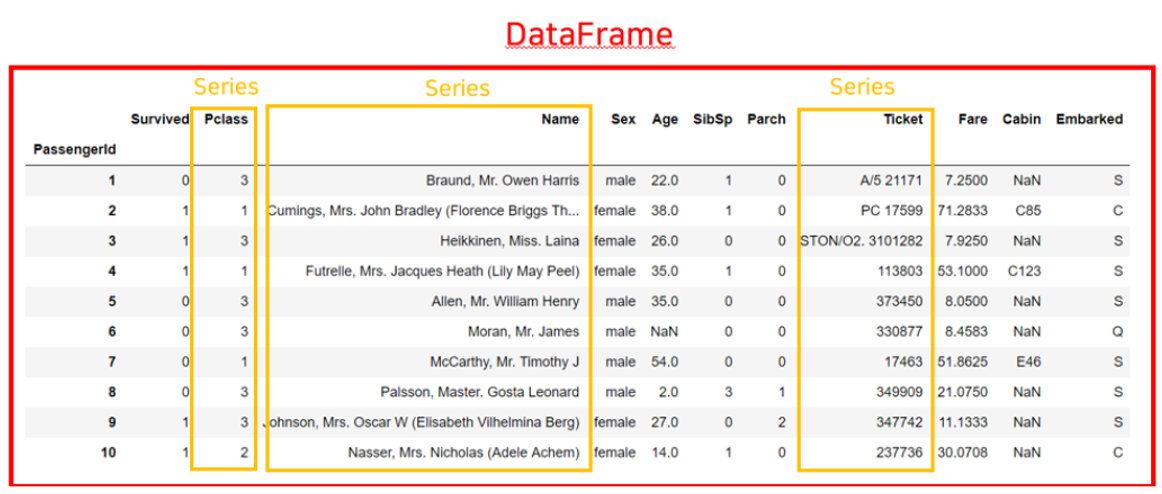

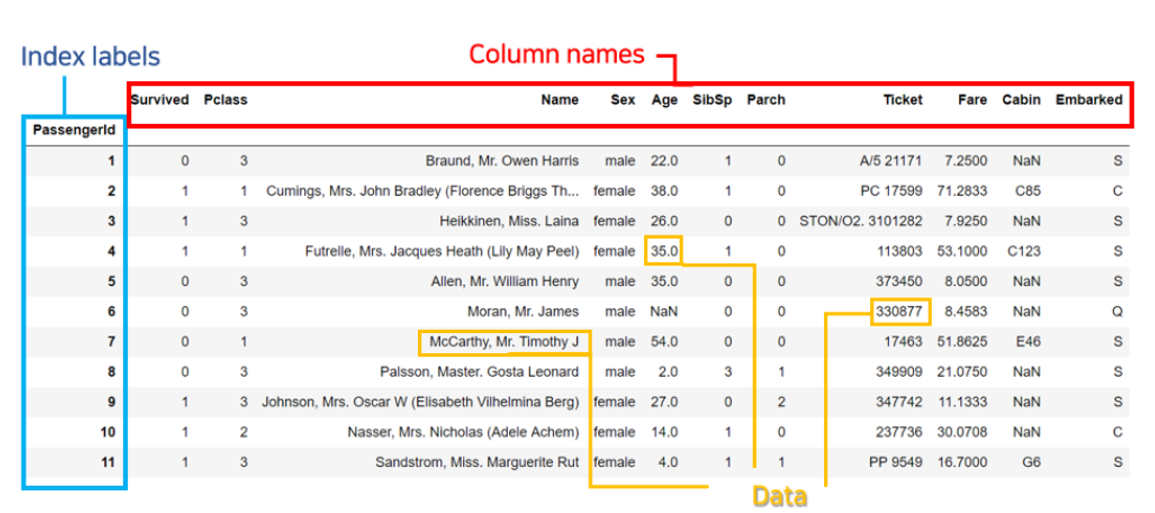

### Pandas 라이브러리 불러오기

In [82]:
import pandas as pd

#### Series 생성
- 각 도시들의 인구수를 Series로 만들어보자!

In [5]:
# 리스트를 이용해 Series 만들기
population = pd.Series([9904312, 3448737, 2890451, 2466052])
population
# 인덱스를 따로 설정하지 않으면 좌측에 자동으로 인덱스 번호로 생성됨

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [6]:
# 인덱스를 지정하여 시리즈 생성하기
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                      index=['서울', '부산', '인천', '대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [7]:
# 딕셔너리를 이용해 Series 생성하기
population = pd.Series({"서울":9904312, '부산':3448737, '인천':2890451, '대구':2466052})
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [8]:
type(population)

pandas.core.series.Series

#### Series 이름, 인덱스 이름 지정

In [10]:
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [11]:
# Series의 index 이름 설정
population.index.name = '도시'
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [13]:
population.index = ['A', 'B', 'C', 'D']
population

A    9904312
B    3448737
C    2890451
D    2466052
Name: 인구, dtype: int64

In [14]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                      index=['서울', '부산', '인천', '대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 데이터 변경, 추가, 삭제

In [15]:
# 데이터 변경
population['부산'] = 3500000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
dtype: int64

In [19]:
# 데이더 추가
population['대전'] = 2400000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

In [20]:
# 데이터 삭제
del population['서울']
population

부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

#### DataFrame 생성

- 딕셔너리 이용 DF 생성하기

In [21]:
data = {'서울' :[9904312, 9631482],
       '부산':[3448737, 3393191],
       '인천':[2890451, 2632035],
       '대구':[2466052, 2431774]
       }

ind = ['2015', '2010']

In [22]:
population_df1 = pd.DataFrame(data, index=ind)
population_df1
# Series와는 달리 key값이 컬럼명으로 들어감(Series에서는 key값이 index로 들어감!)

서울       부산       인천       대구
2015  9904312  3448737  2890451  2466052
2010  9631482  3393191  2632035  2431774

- 리스트 이용 DF 생성하기

In [23]:
data = [[9904312, 3448737, 2890451, 2466052],
        [9631482, 3393191, 2632035, 2431774]]
ind = ['2015', '2010']
col = ['서울', '부산', '인천', '대구']

In [24]:
population_df2 = pd.DataFrame(data, columns=col, index=ind)
population_df2

서울       부산       인천       대구
2015  9904312  3448737  2890451  2466052
2010  9631482  3393191  2632035  2431774

#### 정리
- DF을 생성하는 방법은 2가지(딕셔너리 활용, 리스트 활용)
- 딕셔너리 방식은 key값이 컬럼명, value값이 데이터(위에서 아래방향)로 들어가고
- 리스트 방식은 데이터가 보이는 위치 그대로 들어감

In [26]:
population_df2 = population_df2.T
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

#### DataFrame에 새로운 컬럼 추가하기

In [28]:
# DF명칭에 대괄호로 새로운 컬럼명을 작성한 후 대입연산자로 데이터 값들을 추가
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

#### 컬럼(열) 삭제

In [29]:
del population_df2['2005']
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

In [30]:
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

#### 행 or 열 삭제

In [31]:
population_df2.drop('서울', axis=0)

2015     2010     2005
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

In [36]:
population_df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

In [40]:
# drop함수는 행 또는 열을 삭제할 수 있음(디폴트로는 행을 삭제함)
# 열을 삭제하고 싶다면 axis=1(컬럼표시)로 설정해줘야함
# axis=0으로 설정하면 행이 삭제됨(디폴트 값)
# inplace=True : 변경된 사항을 변수에 바로 저장
population_df2.drop('2005', axis=1, inplace=True)
population_df2

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

#### 정리
- del은 컬럼(열)만 삭제
- drop은 행, 열 둘다 삭제 가능(다만 axis설정이 필요함)
- axis=0(디폴트 값)은 행, axis=1은 열

#### DF 속성 확인
- 형태, 인덱스, 컬럼명 확인

In [42]:
population_df2.shape

# DF 행,열 확인(인덱스는 컬럼으로 치지 않음)

(4, 2)

In [43]:
# DF의 데이터 값만 확인
population_df2.values

array([[9904312, 9631482],
       [3448737, 3393191],
       [2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [45]:
# DF의 인덱스 확인
population_df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [46]:
# DF의 컬럼명 확인
population_df2.columns

Index(['2015', '2010'], dtype='object')

In [47]:
name = ['홍길동', '김사또', '임꺽정']
values = [[175.3, 66.2, 27.0],
         [180.2, 78.9, 49.0],
         [178.6, 55.1, 35.0]]
columns = ['키', '몸무게', '나이']

df = pd.DataFrame(values, index=name, columns=columns)
df

키   몸무게    나이
홍길동  175.3  66.2  27.0
김사또  180.2  78.9  49.0
임꺽정  178.6  55.1  35.0

In [48]:
df.T

홍길동    김사또    임꺽정
키    175.3  180.2  178.6
몸무게   66.2   78.9   55.1
나이    27.0   49.0   35.0

### Pandas 연산! 
- numpy와 마찬가지로 연산이 가능!

- Series 연산

In [49]:
# 리스트 이용 시리즈 생성
population = pd.Series([9900000, 3400000, 2800000, 2400000],
                      index=['서울', '부산', '인천', '대구']
                      )

In [53]:
# 딕셔너리 이용 시리즈 생성
population2 = pd.Series({'서울':9600000, '부산':3300000, 
                         '인천':2600000, '대전':1400000})

In [51]:
population

서울    9900000
부산    3400000
인천    2800000
대구    2400000
dtype: int64

In [54]:
population2

서울    9600000
부산    3300000
인천    2600000
대전    1400000
dtype: int64

In [55]:
population/1000000

서울    9.9
부산    3.4
인천    2.8
대구    2.4
dtype: float64

In [56]:
population*2

서울    19800000
부산     6800000
인천     5600000
대구     4800000
dtype: int64

In [57]:
population-population2

대구         NaN
대전         NaN
부산    100000.0
서울    300000.0
인천    200000.0
dtype: float64

- 인덱스가 다른 시리즈끼리 연산을 진행하면 해당 인덱스의 값은 연산 불가(Nan : Not a number)

- DataFrame 연산

In [60]:
df1 = pd.DataFrame({'2015':[9904312, 3448737, 2890451, 2466052],
                    '2010':[9631482, 3393191, 2632035, 2431774]})
df1

2015     2010
0  9904312  9631482
1  3448737  3393191
2  2890451  2632035
3  2466052  2431774

In [61]:
df2 = pd.DataFrame({'2015':[9904312, 3448737, 2890451, 2466052],
                    '2010':[9631482, 3393191, 2632035, 2431774],
                    '2005':[9762546, 3512547, 2517680, 2456016]},
                   index=['서울', '부산','인천','대구'])
df2

2015     2010     2005
서울  9904312  9631482  9762546
부산  3448737  3393191  3512547
인천  2890451  2632035  2517680
대구  2466052  2431774  2456016

In [62]:
# 인덱스랑 컬럼명이 다르면 연산 불가
df2 - df1

2005  2010  2015
0    NaN   NaN   NaN
1    NaN   NaN   NaN
2    NaN   NaN   NaN
3    NaN   NaN   NaN
대구   NaN   NaN   NaN
부산   NaN   NaN   NaN
서울   NaN   NaN   NaN
인천   NaN   NaN   NaN

In [63]:
df1.index = ['서울', '부산', '인천', '대구']
df1

2015     2010
서울  9904312  9631482
부산  3448737  3393191
인천  2890451  2632035
대구  2466052  2431774

In [65]:
# 인덱스가 같으면 같은 컬럼명의 데이터들 끼리만 연산
df2 - df1

2005  2010  2015
서울   NaN     0     0
부산   NaN     0     0
인천   NaN     0     0
대구   NaN     0     0

### Pandas에서 데이터 접근을 위한 인덱싱, 슬라이싱
- 인덱스 번호로 접근
- 인덱스 명으로 접근
- loc, iloc 인덱서를 활용한 접근
- 불리언 인덱싱을 활용한 접근

- Series 인덱싱

In [66]:
score = pd.Series({'java':70, 'python':95, 'html/css':80, 'ML':85})
score

java        70
python      95
html/css    80
ML          85
dtype: int64

In [70]:
# 인덱스 번호로 접근
score[1]

95

In [71]:
# 인덱스 명으로 접근
score['python']

95

In [72]:
# 인덱스 명 자체에 접근하고 싶을 때
score.index[1]

'python'

- Series 슬라이싱

In [74]:
# python에서 ML까지 인덱스 번호로 접근
score[1:]

# Series를 슬라이싱하면 인덱스 명과 값이 같이 출력됨

python      95
html/css    80
ML          85
dtype: int64

In [76]:
score.index[1:]

Index(['python', 'html/css', 'ML'], dtype='object')

In [77]:
score.values[1:]

array([95, 80, 85], dtype=int64)

In [79]:
# python부터 ML까지 인덱스 명으로 접근
score['python':'ML']
# 인덱스 명으로 접근할때는 끝 인덱스 명칭까지 포함

python      95
html/css    80
ML          85
dtype: int64

In [84]:
# read_csv : csv파일을 불러와서 df으로 출력시켜주는 함수
# enocindg{인코딩} : 컴퓨터가 사람이 사용하는 문자를 인식할 수 있게 해주는 과정
# euc-kr : 한글 문자 전용 인코딩 방식

score_data = pd.read_csv('score.csv', encoding='euc-kr', index_col='과목')
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

- DF 열(컬럼) 인덱싱

In [86]:
# 1반 컬럼에 접근
score_data['1반']
# Series 형태로 출력

과목
수학    45
영어    76
국어    47
사회    92
과학    11
Name: 1반, dtype: int64

In [87]:
# []를 한번 더 씌우면 DF로 출력됨
score_data[['1반']]

1반
과목    
수학  45
영어  76
국어  47
사회  92
과학  11

In [89]:
# 두 개 이상의 컬럼 인덱싱(DF출력시에는 반드시 [] 두 개 사용할 것)
score_data[['1반', '3반']]

1반  3반
과목        
수학  45  73
영어  76  45
국어  47  45
사회  92  85
과학  11  47

- DF 행 인덱싱

In [90]:
# DF에서는 행 인덱싱을 위해서 슬라이싱 문법을 적용해줘야 함
score_data[0:1]

1반  2반  3반  4반
과목                
수학  45  44  73  39

In [91]:
score_data['수학':'영어']

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69

In [92]:
score_data[0:3:2]

1반  2반  3반  4반
과목                
수학  45  44  73  39
국어  47  92  45  69

### 정리
- DF의 기본적인 열 접근은 컬럼명으로
- 행 접근은 슬라이싱 문법으로 접근함

### loc(location), iloc(integer location)를 활용한 인덱싱, 슬라이싱
- 한 번에 행과 열에 모두 접근 가능
- 기본적으로 행에 먼저 접근

In [96]:
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [101]:
score_data.loc['과학']

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [102]:
# DF명.loc[행, 열]
score_data.loc['과학', '4반']

26

In [104]:
score_data.iloc[4]

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [103]:
score_data.iloc[4, 3]

26

- 2반의 사회 점수 데이터 접근해보세요(loc, iloc 각각 한번씩 사용)

In [106]:
score_data.loc['사회', '2반']

81

In [108]:
score_data.iloc[3, 1]

81

- 2반과 3반의 국어, 사회 점수에 접근해 보세요

In [118]:
score_data.loc[['국어','사회'], ['2반', '3반']]

2반  3반
과목        
국어  92  45
사회  81  85

In [114]:
score_data.iloc[2:4, 1:3]

2반  3반
과목        
국어  92  45
사회  81  85

#### 불리언 인덱싱(Boolean Indexing)
- numpy의 array와 동일하며 DF에서 특정한 조건에 맞는 데이터에만 접근하기 위한 인덱싱 방법

In [120]:
score_data = score_data.T
score_data

과목  수학  영어  국어  사회  과학
1반  45  76  47  92  11
2반  44  92  92  81  79
3반  73  45  45  85  47
4반  39  69  69  40  26

In [132]:
score_data[score_data['영어'] >= 75]

과목  수학  영어  국어  사회  과학
1반  45  76  47  92  11
2반  44  92  92  81  79

In [133]:
score_data[score_data['영어'] >= 75]['영어']

1반    76
2반    92
Name: 영어, dtype: int64

In [134]:
score_data[score_data['영어'] >= 75]['영어'][0]

76

### Pandas 유용한 함수들

#### 정렬 함수
- index 및 컬럼명 기준 정렬 : sort_index()
- 값 기준 정렬 : sort_values()

In [135]:
score_data = score_data.T
score_data

1반  2반  3반  4반
과목                
수학  45  44  73  39
영어  76  92  45  69
국어  47  92  45  69
사회  92  81  85  40
과학  11  79  47  26

In [137]:
score_data.sort_index()

1반  2반  3반  4반
과목                
과학  11  79  47  26
국어  47  92  45  69
사회  92  81  85  40
수학  45  44  73  39
영어  76  92  45  69

In [142]:
score_data.sort_index(axis=1, ascending=False)

4반  3반  2반  1반
과목                
수학  39  73  44  45
영어  69  45  92  76
국어  69  45  92  47
사회  40  85  81  92
과학  26  47  79  11

- value(데이터 값) 기준 정렬

In [143]:
# DF의 컬럼이나 index가 여러개일 경우 그 중 기준을 설정
score_data.sort_values(by='3반')

1반  2반  3반  4반
과목                
영어  76  92  45  69
국어  47  92  45  69
과학  11  79  47  26
수학  45  44  73  39
사회  92  81  85  40

In [145]:
score_data.sort_values(by='3반', ascending=False)

1반  2반  3반  4반
과목                
사회  92  81  85  40
수학  45  44  73  39
과학  11  79  47  26
영어  76  92  45  69
국어  47  92  45  69

In [147]:
score_data.sort_values(by='사회', ascending=False, axis=1)

1반  3반  2반  4반
과목                
수학  45  73  44  39
영어  76  45  92  69
국어  47  45  92  69
사회  92  85  81  40
과학  11  47  79  26

#### 정리
- axis=0 (행 방향=위에서 아래로)일 경우는 기준(by)을 컬럼명으로 잡고
- axis=1 (열 방향=좌에서 우로)일 경우는 기준(by)을 인덱스로 잡는다